### Exploratory Data Analysis for SE4 region for year 2000.

In [1]:
import glob
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn import preprocessing as prep
from scipy.stats import pearsonr

In [2]:
reduced_data = pd.read_csv('two_years_merged_and_reduced.csv')
reduced_data.time = pd.to_datetime(reduced_data.time)
#convert 'time' column to index
reduced_data = reduced_data.set_index('time')
reduced_data = reduced_data.rename(columns= {'power-production' : 'PowerProduction'},)

In [3]:
reduced_data

,cluster,region,Temperature,RelativeHumidity,Wind_U,Wind_V,Pressure,CloudCover,WindGustSpeed,distance,PowerProduction
time,,,,,,,,,,,
2001-09-25 00:00:00+00:00,0.0,SE1,276.27032,0.874569,0.555601,-0.906430,101428.560,0.607713,3.095568,0.507503,234.255257
2001-09-25 00:00:00+00:00,0.0,SE2,275.47623,0.952604,-0.051448,0.466945,101536.750,0.293875,1.910384,0.557766,507.915347
2001-09-25 00:00:00+00:00,0.0,SE3,280.37006,0.875572,-1.359538,-0.576212,101493.200,0.515114,3.452081,0.512443,325.436187
2001-09-25 00:00:00+00:00,0.0,SE4,283.44300,0.857183,-2.918322,-1.645965,101162.030,0.419923,5.657266,0.512595,372.884422
2001-09-25 00:00:00+00:00,1.0,SE1,278.41770,0.790456,1.448222,-1.308097,101332.710,0.858191,4.362358,0.544618,234.255257
...,...,...,...,...,...,...,...,...,...,...,...
2000-10-24 23:00:00+00:00,1.0,SE4,278.93427,0.784522,2.432857,-1.942119,100348.270,0.413113,6.716806,0.524744,303.203043
2000-10-24 23:00:00+00:00,2.0,SE1,271.26038,0.949919,-0.559966,-1.507525,100189.984,0.958803,3.694544,0.529363,63.121898
2000-10-24 23:00:00+00:00,2.0,SE2,272.10324,0.880736,1.400531,-1.577895,99932.910,0.251627,5.007649,0.538612,271.710246


In [4]:
#SE4
df_SE4 = reduced_data[reduced_data.region == 'SE4']
df_SE4 = df_SE4.drop(labels=['region', 'cluster', 'distance'], axis=1)

In [5]:
#resampled to aggregate the hourly data into single day for all days
df_SE4_sampled_M = df_SE4.resample('M').mean()

#resampling adds datetime indexes which were not there in reduced data and fills its columns values with NaN. 
#Need to drop these rows
df_SE4_sampled_M = df_SE4_sampled_M.dropna()

In [6]:
scaler = prep.MinMaxScaler()
df_SE4_normalized_M = df_SE4_sampled_M.copy()
df_SE4_normalized_M[df_SE4_normalized_M.columns] = scaler.fit_transform(df_SE4_normalized_M[df_SE4_normalized_M.columns])

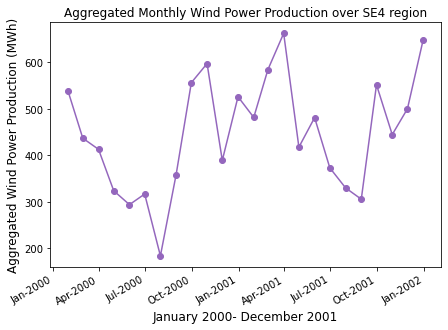

In [7]:
plt.figure(figsize=(7,5))
plt.plot(df_SE4_sampled_M.PowerProduction, 'tab:purple', marker='o')
#plt.plot(summer_sample.WindGustSpeed, 'g', marker='^')
plt.ylabel('Aggregated Wind Power Production (MWh)', fontsize=12)
plt.xlabel('January 2000- December 2001', fontsize=12)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title('Aggregated Monthly Wind Power Production over SE4 region')
plt.savefig("Aggregated_Wind_Power_M_SE4.png", transparent=True)

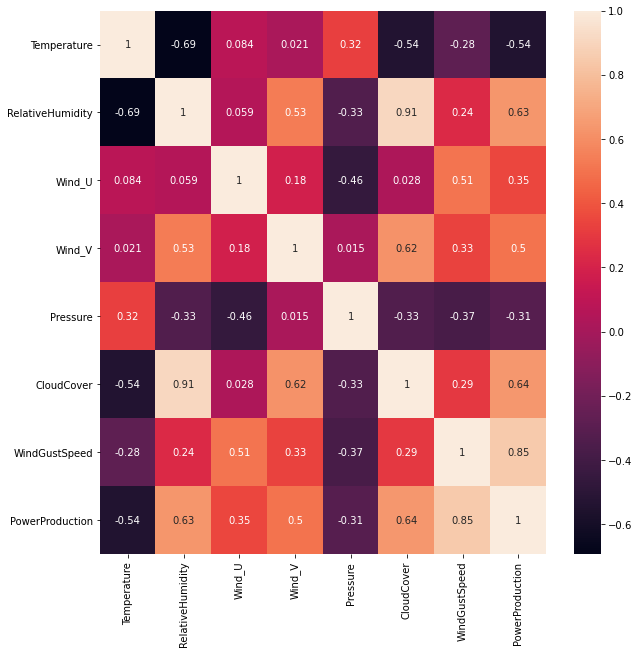

In [8]:
import seaborn as sns
df_small = df_SE4_sampled_M.iloc[:,:]
correlation_mat = df_small.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [9]:
#resampled to aggregate the hourly data into single day for all days
df_SE4_sampled_D = df_SE4.resample('D').mean()

#resampling adds datetime indexes which were not there in reduced data and fills its columns values with NaN. 
#Need to drop these rows
df_SE4_sampled_D = df_SE4_sampled_D.dropna()
df_SE4_sampled_D.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 668 entries, 2000-01-01 00:00:00+00:00 to 2001-12-31 00:00:00+00:00
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       668 non-null    float64
 1   RelativeHumidity  668 non-null    float64
 2   Wind_U            668 non-null    float64
 3   Wind_V            668 non-null    float64
 4   Pressure          668 non-null    float64
 5   CloudCover        668 non-null    float64
 6   WindGustSpeed     668 non-null    float64
 7   PowerProduction   668 non-null    float64
dtypes: float64(8)
memory usage: 47.0 KB


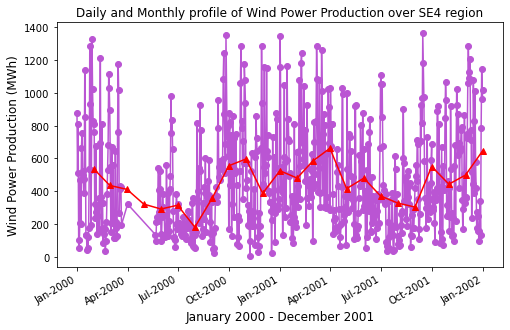

In [10]:
plt.figure(figsize=(8,5))
plt.plot(df_SE4_sampled_D.PowerProduction, 'mediumorchid', marker='o')
plt.plot(df_SE4_sampled_M.PowerProduction, 'r', marker='^')
#plt.plot(summer_sample.WindGustSpeed, 'g', marker='^')
plt.ylabel('Wind Power Production (MWh)', fontsize=12)
plt.xlabel('January 2000 - December 2001', fontsize=12)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title("Daily and Monthly profile of Wind Power Production over SE4 region")
plt.savefig("Aggregated_Wind_Power_D_M_SE4.png", transparent=True)

In [11]:
scaler = prep.MinMaxScaler()
df_SE4_normalized_D = df_SE4_sampled_D.copy()
df_SE4_normalized_D[df_SE4_normalized_D.columns] = scaler.fit_transform(df_SE4_normalized_D[df_SE4_normalized_D.columns])

In [12]:
winter_sample = df_SE4_normalized_D.loc['2000-01-01': '2000-03-31']
spring_sample = df_SE4_normalized_D.loc['2000-04-01': '2000-05-31']
summer_sample = df_SE4_normalized_D.loc['2000-06-01': '2000-08-31']
autumn_sample = df_SE4_normalized_D.loc['2000-09-01': '2000-11-30']

In [13]:
df_seasons = [winter_sample, spring_sample, summer_sample, autumn_sample]

In [14]:
# speed_list = []
# power_list =[]
# for season in df_seasons:
#     max_index = season['WindGustSpeed'].idxmax()
#     #print(season['WindGustSpeed'].idxmax())
#     print('WindGustSpeed of {}: {}'.format(max_index, season.loc[max_index].WindGustSpeed))
#     print('PowerProduction of {}: {} \n'.format(max_index, season.loc[max_index].PowerProduction))
#     speed_list.append(season.loc[max_index].WindGustSpeed)
#     power_list.append(season.loc[max_index].PowerProduction)

In [15]:
speed_list = []
power_list =[]
for season in df_seasons:
    season_mean_speed = season['WindGustSpeed'].mean()
    season_mean_power = season['PowerProduction'].mean()
    #print(season_mean_speed, season_mean_power)
    speed_list.append(season_mean_speed)
    power_list.append(season_mean_power)
print(speed_list)
print(power_list)

[0.4627532171495134, 0.4231846908614496, 0.4230318661550418, 0.4694751178530166]
[0.34056798304209535, 0.21250668603813536, 0.20480437092999448, 0.3741871857637643]


In [16]:
seasons = ['winter', 'spring', 'summer', 'autumn']

speed_idx = speed_list.index(max(speed_list))
power_idx = power_list.index(max(power_list))

print('maximum wind speed in {}'.format(seasons[speed_idx]))
print('maximum wind power produced in {}'.format(seasons[power_idx]))

maximum wind speed in autumn
maximum wind power produced in autumn


Text(0.5, 1.0, 'Winter')

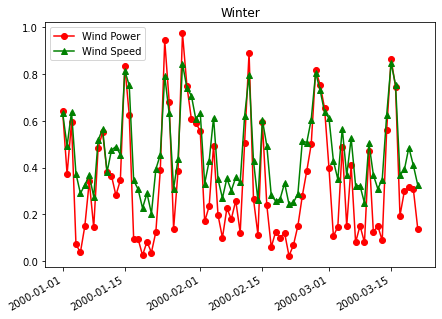

In [17]:
#winter
plt.figure(figsize=(7,5))
plt.plot(winter_sample.PowerProduction, 'r', marker='o')
plt.plot(winter_sample.WindGustSpeed, 'g', marker='^')
plt.gcf().autofmt_xdate()
plt.legend(['Wind Power', 'Wind Speed'])
plt.title('Winter')

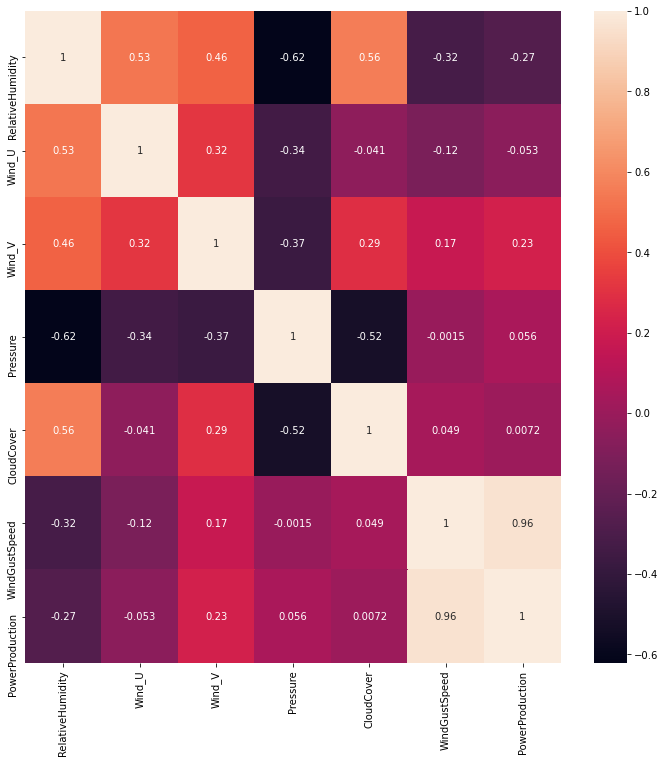

In [18]:
import seaborn as sns
df_small = winter_sample.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

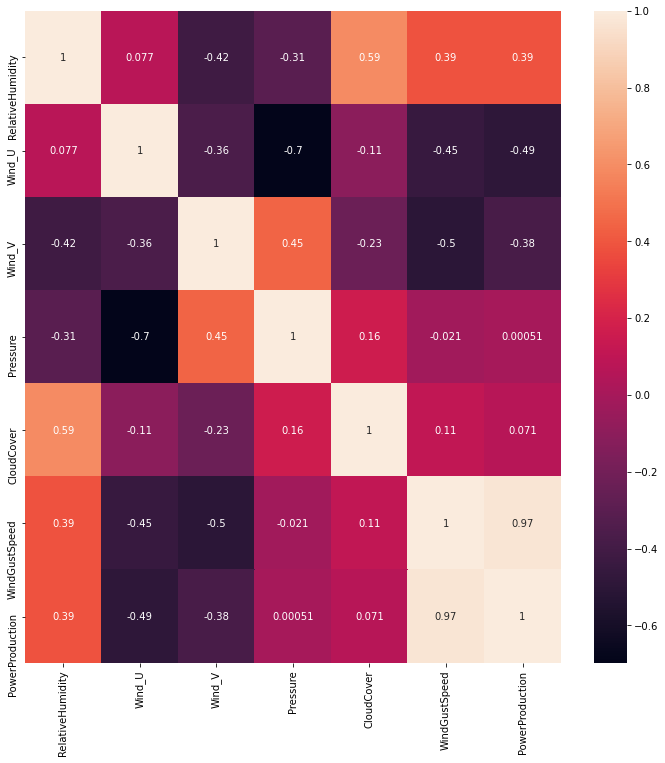

In [19]:
import seaborn as sns
df_small = spring_sample.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

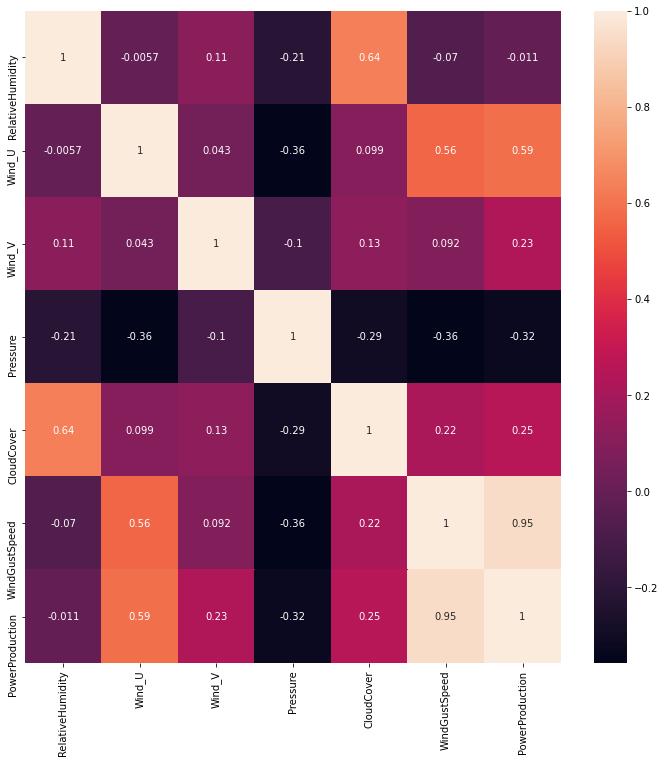

In [20]:
import seaborn as sns
df_small = summer_sample.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

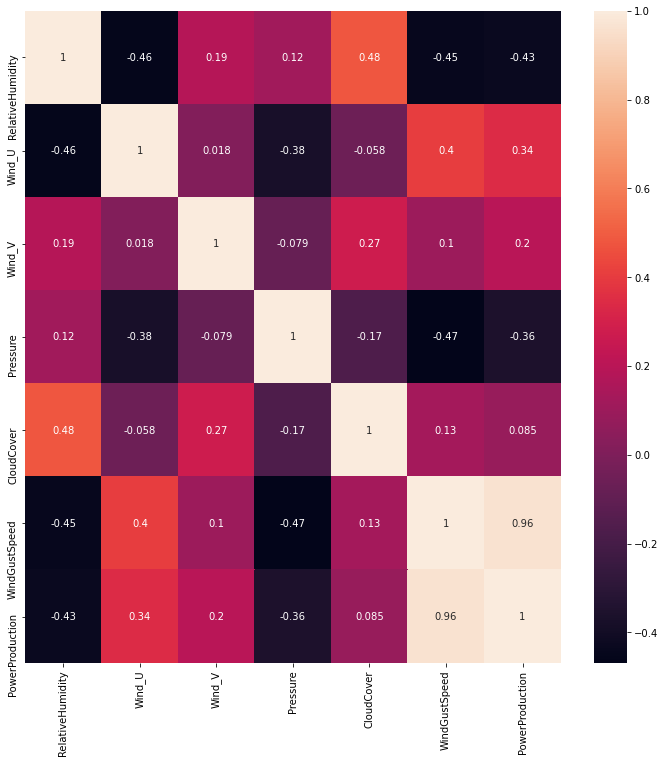

In [21]:
import seaborn as sns
df_small = autumn_sample.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

###### maximum average wind speed and power production is in autumn season. 0.4694& 0.3741
###### Correlation value of wind speed and power production is between 0.95-0.97 for all seasons. Maximum is in spring. autumn:0.96.
###### All other variables have very less coorelation value compared to wind speed variable or have negative value.
###### average speed and power production:
'[0.4627532171495134, 0.4231846908614496, 0.4230318661550418, 0.4694751178530166] and 
[0.34056798304209535, 0.21250668603813536, 0.20480437092999448, 0.3741871857637643]'

In [22]:
winter_sample_01 = df_SE4_normalized_D.loc['2001-01-01': '2001-03-31']
spring_sample_01 = df_SE4_normalized_D.loc['2001-04-01': '2001-05-31']
summer_sample_01 = df_SE4_normalized_D.loc['2001-06-01': '2001-08-31']
autumn_sample_01 = df_SE4_normalized_D.loc['2001-09-01': '2001-11-30']

In [23]:
df_seasons_f = [winter_sample, spring_sample, summer_sample, autumn_sample, winter_sample_01, spring_sample_01, summer_sample_01, autumn_sample_01]

In [24]:
speed_list_f = []
power_list_f =[]
wind_u_list_f = []
wind_v_list_f = []
for season in df_seasons_f:
    season_mean_speed = season['WindGustSpeed'].mean()
    season_mean_power = season['PowerProduction'].mean()
    season_mean_wind_u = season['Wind_U'].mean()
    season_mean_wind_v = season['Wind_V'].mean()
    #print(season_mean_speed, season_mean_power)
    speed_list_f.append(season_mean_speed)
    power_list_f.append(season_mean_power)
    wind_u_list_f.append(season_mean_wind_u)
    wind_v_list_f.append(season_mean_wind_v)
print(speed_list_f)
print(power_list_f)

[0.4627532171495134, 0.4231846908614496, 0.4230318661550418, 0.4694751178530166, 0.49172594380847445, 0.47302767595021394, 0.43283329485457417, 0.4710166715742132]
[0.34056798304209535, 0.21250668603813536, 0.20480437092999448, 0.3741871857637643, 0.41952590937441, 0.32578610387386564, 0.2417493699874355, 0.36197768026461674]


In [25]:
seasons_f = ['Winter-2000', 'Spring-2000', 'Summer-2000', 'Autumn-2000', 'Winter-2001', 'Spring-2001', 'Summer-2001', 'Autumn-2001']

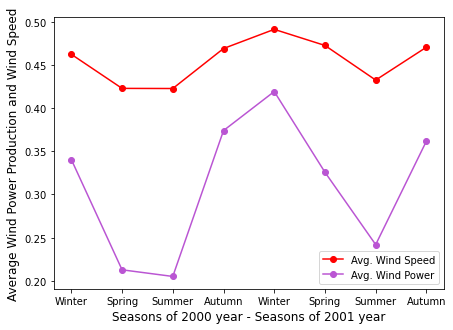

In [34]:
plt.figure(figsize=(7,5))
plt.plot(seasons_f,speed_list_f, 'r', marker='o')
plt.plot(seasons_f,power_list_f, 'mediumorchid', marker='o')

plt.ylabel('Average Wind Power Production and Wind Speed', fontsize=12)
plt.xlabel('Seasons of 2000 year - Seasons of 2001 year', fontsize=12)
ticks = [0, 1, 2, 3, 4, 5, 6, 7]
labels = ["Winter", "Spring", "Summer", "Autumn", "Winter", "Spring", "Summer", "Autumn"]
plt.xticks(ticks, labels)
#plt.title('Seasonal Average Wind Power Production and Wind Speed over SE4')
plt.legend(['Avg. Wind Speed','Avg. Wind Power'])
plt.savefig("Seasonal_Avg_Wind_Prod_SE4.png", transparent=True)

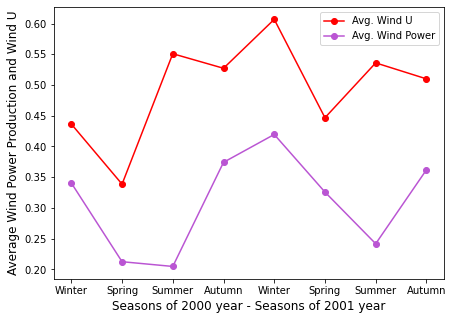

In [31]:
plt.figure(figsize=(7,5))
plt.plot(seasons_f,wind_u_list_f, 'r', marker='o')
plt.plot(seasons_f,power_list_f, 'mediumorchid', marker='o')
plt.ylabel('Average Wind Power Production and Wind U', fontsize=12)
plt.xlabel('Seasons of 2000 year - Seasons of 2001 year', fontsize=12)
ticks = [0, 1, 2, 3, 4, 5, 6, 7]
labels = ["Winter", "Spring", "Summer", "Autumn", "Winter", "Spring", "Summer", "Autumn"]
plt.xticks(ticks, labels)
#plt.title('Seasonal Profile of Average Wind Power Production and Wind U over SE4 region')
plt.legend(['Avg. Wind U','Avg. Wind Power'])
plt.savefig("Seasonal_Avg_Wind_Prod_Wind_U_SE4.png", transparent=True)

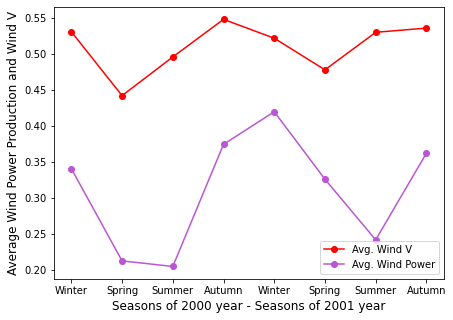

In [33]:
plt.figure(figsize=(7,5))
plt.plot(seasons_f,wind_v_list_f, 'r', marker='o')
plt.plot(seasons_f,power_list_f, 'mediumorchid', marker='o')
plt.ylabel('Average Wind Power Production and Wind V', fontsize=12)
plt.xlabel('Seasons of 2000 year - Seasons of 2001 year', fontsize=12)
ticks = [0, 1, 2, 3, 4, 5, 6, 7]
labels = ["Winter", "Spring", "Summer", "Autumn", "Winter", "Spring", "Summer", "Autumn"]
plt.xticks(ticks, labels)
#plt.title('Seasonal Average Wind Power Production and Wind V over SE4')
plt.legend(['Avg. Wind V','Avg. Wind Power'])
plt.savefig("Seasonal_Avg_Wind_Prod_Wind_V_SE4.png", transparent=True)